# Air quality comparison in Turin during 2020
Comparing Google mobility data with air quality data provided by regional autority (ARPA).

In [91]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics

## Mobility Dataset:

### Reading mobility data 
Provided by: <br>
Google LLC "Google COVID-19 Community Mobility Reports".
https://www.google.com/covid19/mobility/ 

In [92]:
path = 'data/Mobility/2020_IT_Region_Mobility_Report.csv'
it_mobility_data = pd.read_csv(path, parse_dates=['date'])
it_mobility_data

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,IT,Italy,NaN,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-15,3.0,-1.0,35.0,9.0,0.0,-1.0
1,IT,Italy,NaN,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-16,3.0,2.0,26.0,11.0,1.0,-2.0
2,IT,Italy,NaN,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-17,0.0,1.0,7.0,3.0,1.0,0.0
3,IT,Italy,NaN,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-18,3.0,1.0,16.0,4.0,1.0,0.0
4,IT,Italy,NaN,NaN,NaN,NaN,NaN,ChIJA9KNRIL-1BIRb15jJFz1LOI,2020-02-19,0.0,-1.0,11.0,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40759,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2020-12-27,-77.0,-32.0,-52.0,-64.0,-28.0,16.0
40760,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2020-12-28,-57.0,-22.0,-25.0,-61.0,-57.0,25.0
40761,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2020-12-29,-37.0,18.0,-16.0,-59.0,-51.0,21.0
40762,IT,Italy,Veneto,Province of Vicenza,NaN,IT-VI,NaN,ChIJ6bkyp9bKeEcR4H6QFYcJBwM,2020-12-30,-32.0,45.0,-3.0,-56.0,-50.0,19.0


### Filtering Data

In [93]:
#Filtering by sub_region
to_mobility_data = it_mobility_data[it_mobility_data['sub_region_2'] == 'Metropolitan City of Turin'].copy()
#remove empty column
to_mobility_data.dropna(how='all', axis=1, inplace=True)
to_mobility_data

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
25035,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-02-15,0.0,-2.0,19.0,2.0,0.0,-1.0
25036,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-02-16,-3.0,-6.0,0.0,4.0,0.0,-1.0
25037,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-02-17,0.0,0.0,4.0,1.0,0.0,0.0
25038,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-02-18,2.0,-2.0,23.0,3.0,0.0,0.0
25039,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-02-19,1.0,-2.0,17.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25351,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-12-27,-71.0,-34.0,-62.0,-64.0,-25.0,14.0
25352,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-12-28,-27.0,4.0,-24.0,-49.0,-50.0,18.0
25353,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-12-29,-27.0,12.0,-14.0,-47.0,-48.0,18.0
25354,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-12-30,-21.0,34.0,-9.0,-45.0,-48.0,17.0


### Basic statistics

In [94]:
to_mobility_data.describe()

,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,-38.239875,-20.043614,-12.074766,-43.903427,-34.710280,12.439252
std,26.433438,20.420072,38.484583,21.029147,21.068197,11.042682
min,-96.000000,-96.000000,-92.000000,-91.000000,-92.000000,-7.000000
25%,-57.000000,-27.000000,-35.000000,-56.000000,-48.000000,4.000000
50%,-29.000000,-15.000000,-9.000000,-40.000000,-33.000000,9.000000
75%,-17.000000,-8.000000,19.000000,-29.000000,-23.000000,19.000000
max,3.000000,40.000000,110.000000,4.000000,14.000000,46.000000


### Stacked area plot

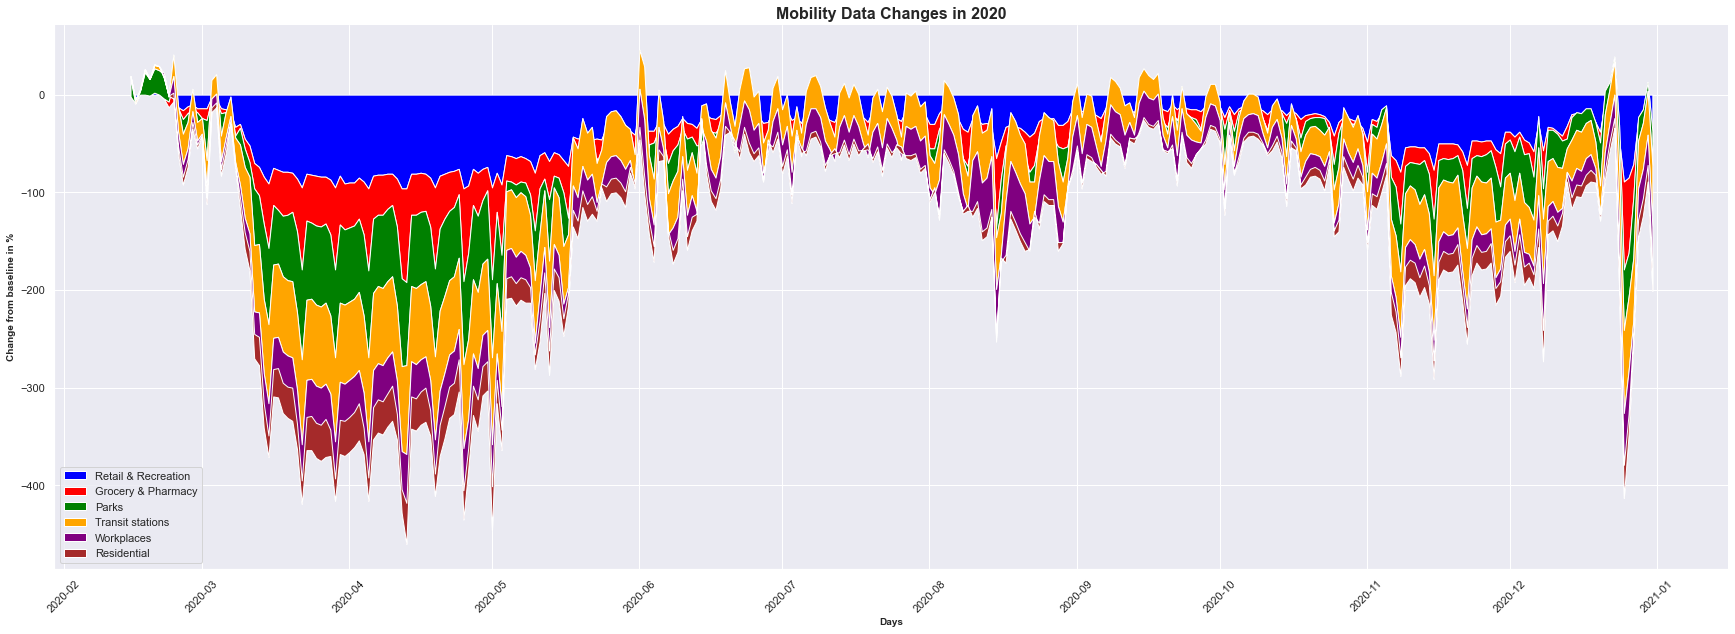

In [95]:
#set seaborn grapichs theme
sns.set_theme()

plt.figure(figsize=(30, 10))
palette = ["blue","red","green","orange","purple","brown"]
labels=['Retail & Recreation','Grocery & Pharmacy','Parks','Transit stations','Workplaces','Residential']

plt.stackplot(to_mobility_data.date, 
              to_mobility_data.retail_and_recreation_percent_change_from_baseline, to_mobility_data.grocery_and_pharmacy_percent_change_from_baseline, to_mobility_data.parks_percent_change_from_baseline, to_mobility_data.transit_stations_percent_change_from_baseline, to_mobility_data.workplaces_percent_change_from_baseline, to_mobility_data.residential_percent_change_from_baseline,colors=palette, labels=labels)

plt.legend(loc='lower left')
plt.xlabel('Days',fontdict= { 'fontsize': 10, 'fontweight':'bold'})
plt.ylabel('Change from baseline in %',fontdict= { 'fontsize': 10, 'fontweight':'bold'})
ax = plt.gca()
ax.tick_params(axis ='x', rotation = 45) 
ax.grid(True)
plt.title("Mobility Data Changes in 2020",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
sns.despine()
plt.show()

### Multi-Line plot

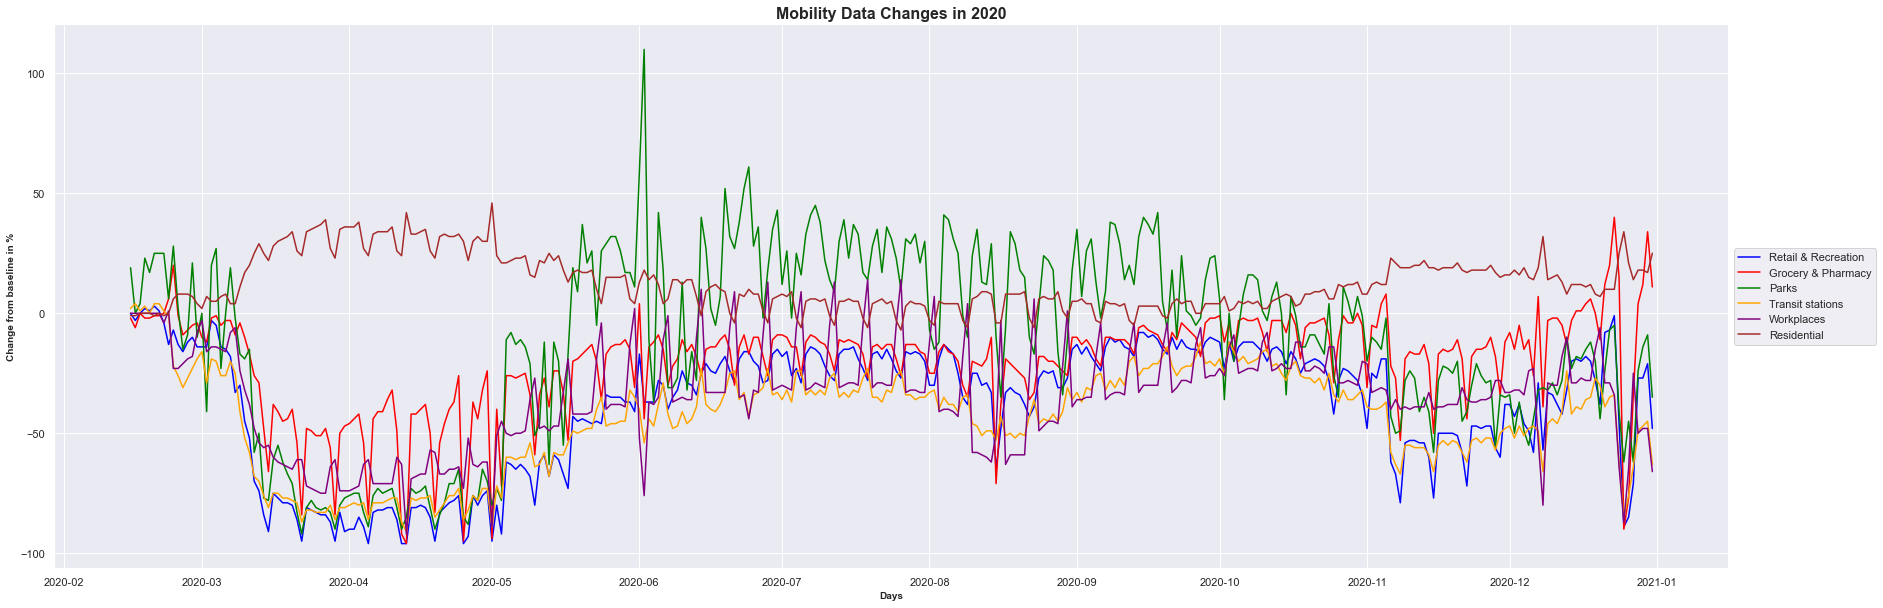

In [96]:
#set seaborn grapichs theme
sns.set_theme()

plt.figure(figsize=(30, 10))

positions = ['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']


# create a color palette
#palette = plt.get_cmap('Paired')

num = 0
plots =[]

for y in positions:
    line = to_mobility_data[y]
    p = plt.plot(to_mobility_data.date,line, label=labels[num], color=palette[num])
    plots += p
    num+=1

plt.xlabel('Days',fontdict= { 'fontsize': 10, 'fontweight':'bold'})
plt.ylabel('Change from baseline in %',fontdict= { 'fontsize': 10, 'fontweight':'bold'})
plt.legend(handles=plots)
plt.title("Mobility Data Changes in 2020",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
ax = plt.gca()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True)
sns.despine()
plt.show()

#### Grouped by month

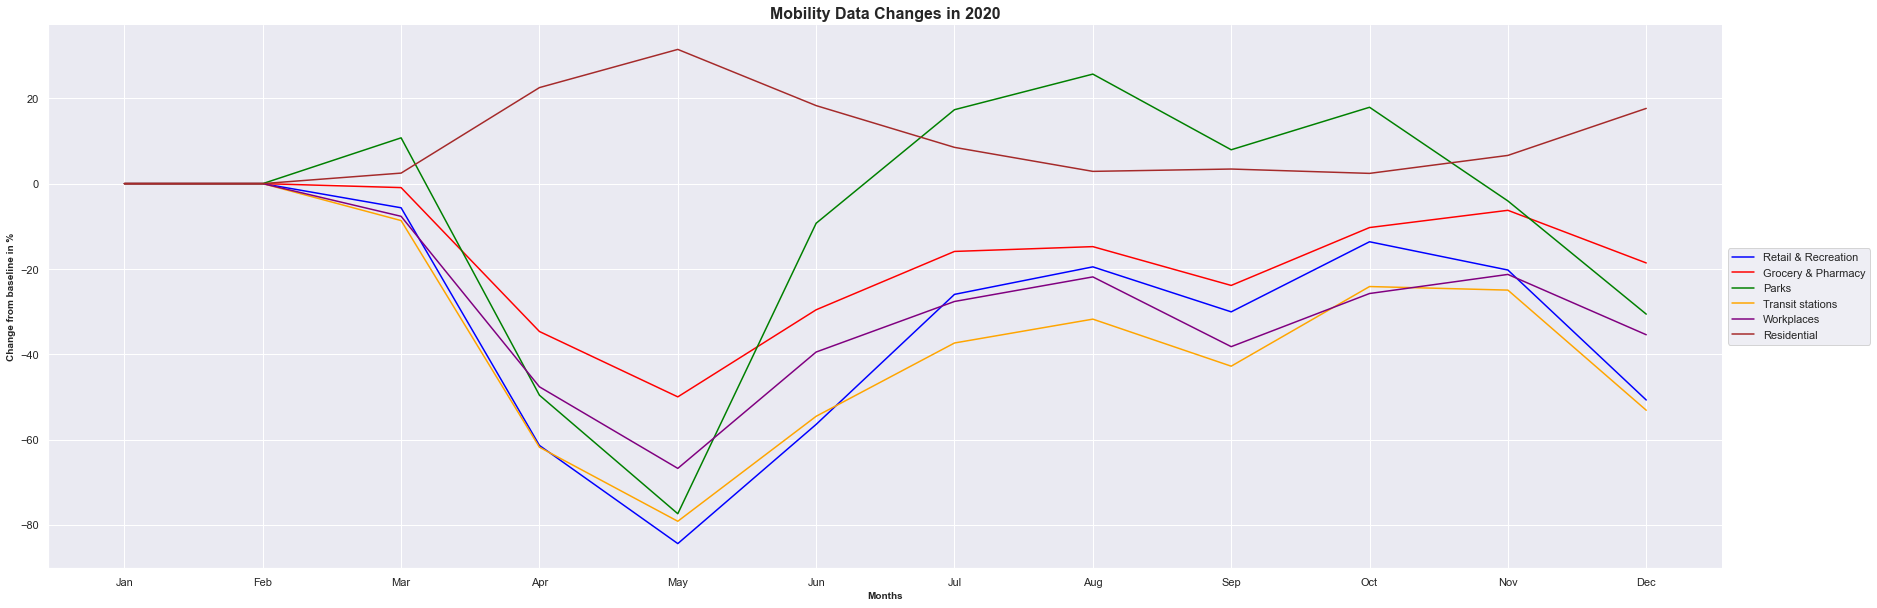

In [97]:
#set seaborn grapichs theme
sns.set_theme()

plt.figure(figsize=(30, 10))

months = np.array(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

num = 0
plots =[]

for pos in positions:
    line=[]
    #calculate the average for each month
    for idx,m in enumerate(months):
        res_month = to_mobility_data[to_mobility_data['date'].dt.month == idx]
        if len(res_month)!=0:
            line.append(statistics.mean(res_month[pos]))
        else:
            line.append(0)

    p = plt.plot(months,line,label=labels[num], color=palette[num])
    plots += p
    num+=1

plt.xlabel('Months',fontdict= { 'fontsize': 10, 'fontweight':'bold'})
plt.ylabel('Change from baseline in %',fontdict= { 'fontsize': 10, 'fontweight':'bold'})
plt.legend(handles=plots)
plt.title("Mobility Data Changes in 2020",fontdict= { 'fontsize': 16, 'fontweight':'bold'})
ax = plt.gca()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True)
sns.despine()
plt.show()

## Air Quality Dataset:

### Reading ARPA data 
Provided by: <br>
Arpa Piemonte <br>
Dipartimento Rischi naturali e ambientali <br>
https://aria.ambiente.piemonte.it/

In [98]:
path = 'data/ARPA/Torino-Rebaudengo_Gas_2020-02-15_2020-12-31.csv'
to_rebaudengo_gas = pd.read_csv(path, sep=';',dtype={'Data rilevamento': str, 'Ora':str},index_col=False ) 

#merge date and hours and parsing
to_rebaudengo_gas["Data rilevamento"] = to_rebaudengo_gas["Data rilevamento"] + " " +  to_rebaudengo_gas["Ora"]
to_rebaudengo_gas["Data rilevamento"] = pd.to_datetime(to_rebaudengo_gas["Data rilevamento"]) 
to_rebaudengo_gas

,Data rilevamento,Ora,Id Rete Monitoraggio,Codice Istat Comune,Progr. Punto Comune,Denominazione Stazione,Id Parametro,Descr. Parametro,Id Un. misura,Descr. Un. misura,Valore,Stato
0,2020-02-15 01:00:00,01:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,303.0,V
1,2020-02-15 02:00:00,02:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,312.0,V
2,2020-02-15 03:00:00,03:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,248.0,V
3,2020-02-15 04:00:00,04:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,235.0,V
4,2020-02-15 05:00:00,05:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,176.0,V
...,...,...,...,...,...,...,...,...,...,...,...,...
7699,2020-12-31 20:00:00,20:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,190.0,V
7700,2020-12-31 21:00:00,21:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,160.0,V
7701,2020-12-31 22:00:00,22:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,157.0,V
7702,2020-12-31 23:00:00,23:00,13,1272,805,Torino - Rebaudengo,22,Ossidi totali di azoto (NOx),23,microgrammi / metro cubo,102.0,V


### Basic statistics

In [99]:
to_rebaudengo_gas.describe(include=[float])

,Valore
count,7368.000000
mean,94.850163
std,92.353033
min,7.000000
25%,37.000000
50%,63.000000
75%,118.000000
max,913.000000


### Line plot

<AxesSubplot:xlabel='Data rilevamento', ylabel='Valore'>

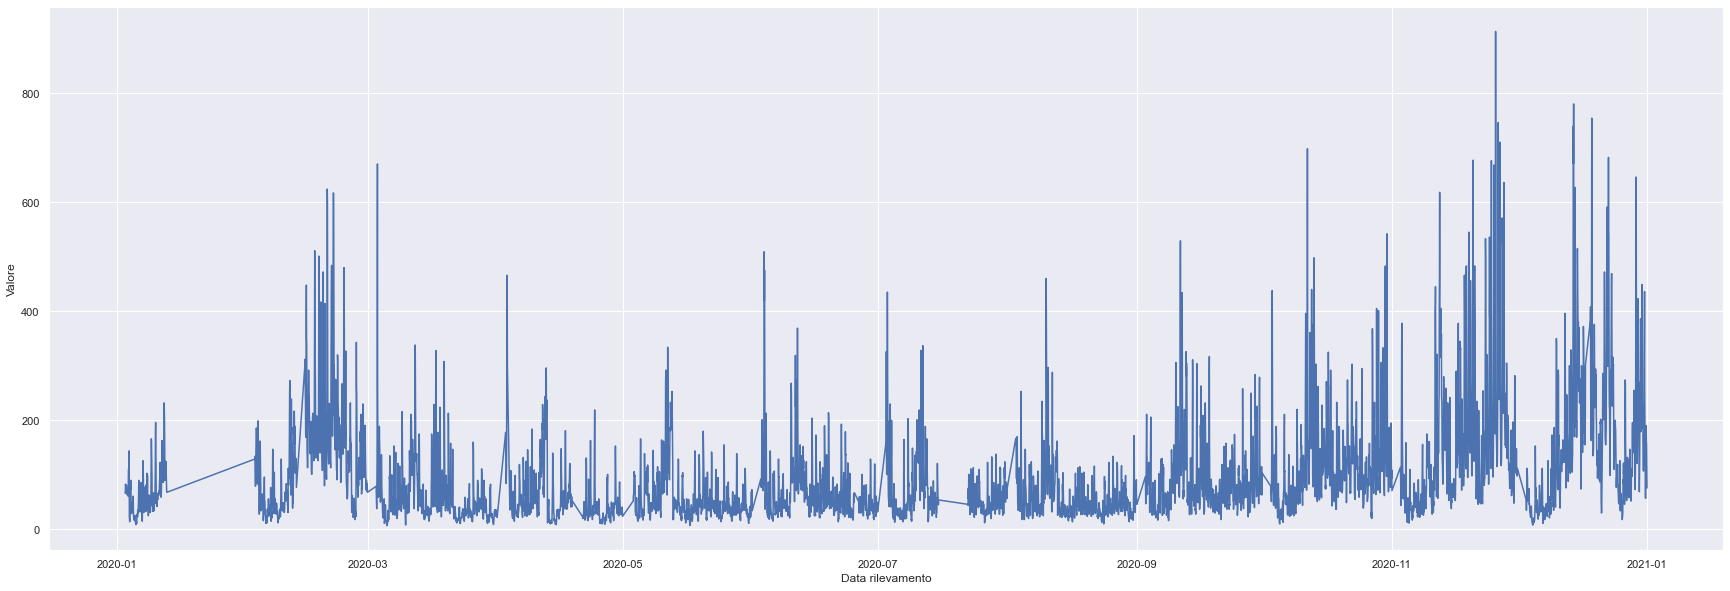

In [100]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=to_rebaudengo_gas, x="Data rilevamento", y="Valore")

### Group by Day

In [101]:
to_rebaudengo_gas_daily = to_rebaudengo_gas.resample('D', on='Data rilevamento').mean()
to_rebaudengo_gas_daily

,Id Rete Monitoraggio,Codice Istat Comune,Progr. Punto Comune,Id Parametro,Id Un. misura,Valore
Data rilevamento,,,,,,
2020-01-03,13.0,1272.0,805.0,22.0,23.0,83.291667
2020-01-04,13.0,1272.0,805.0,22.0,23.0,43.250000
2020-01-05,13.0,1272.0,805.0,22.0,23.0,18.750000
2020-01-06,13.0,1272.0,805.0,22.0,23.0,50.416667
2020-01-07,13.0,1272.0,805.0,22.0,23.0,57.916667
...,...,...,...,...,...,...
2020-12-27,13.0,1272.0,805.0,22.0,23.0,94.125000
2020-12-28,13.0,1272.0,805.0,22.0,23.0,137.875000
2020-12-29,13.0,1272.0,805.0,22.0,23.0,269.166667


<AxesSubplot:xlabel='Data rilevamento', ylabel='Valore'>

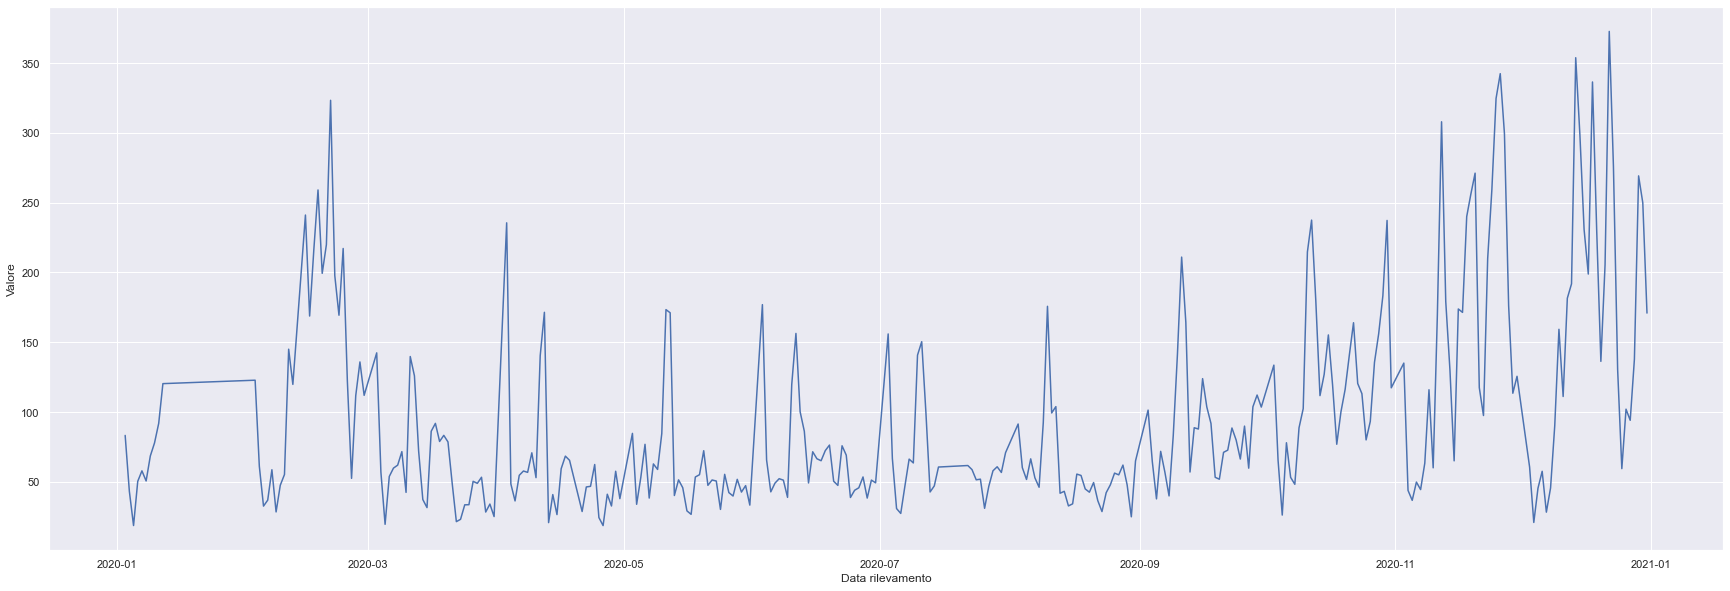

In [102]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=to_rebaudengo_gas_daily, x="Data rilevamento", y="Valore")

### Merging both dataset

In [116]:
merged_data = to_mobility_data.merge(to_rebaudengo_gas_daily[['Valore']], left_on='date', right_on='Data rilevamento')
merged_data

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Valore
0,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-02-15,0.0,-2.0,19.0,2.0,0.0,-1.0,241.125000
1,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-02-16,-3.0,-6.0,0.0,4.0,0.0,-1.0,168.791667
2,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-02-17,0.0,0.0,4.0,1.0,0.0,0.0,216.208333
3,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-02-18,2.0,-2.0,23.0,3.0,0.0,0.0,259.083333
4,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-02-19,1.0,-2.0,17.0,0.0,0.0,0.0,199.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-12-27,-71.0,-34.0,-62.0,-64.0,-25.0,14.0,94.125000
317,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-12-28,-27.0,4.0,-24.0,-49.0,-50.0,18.0,137.875000
318,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-12-29,-27.0,12.0,-14.0,-47.0,-48.0,18.0,269.166667
319,IT,Italy,Piedmont,Metropolitan City of Turin,IT-TO,ChIJ_8Ubk5VFiEcRcH08R33mBQM,2020-12-30,-21.0,34.0,-9.0,-45.0,-48.0,17.0,249.875000


### Merged Lineplot

<AxesSubplot:>

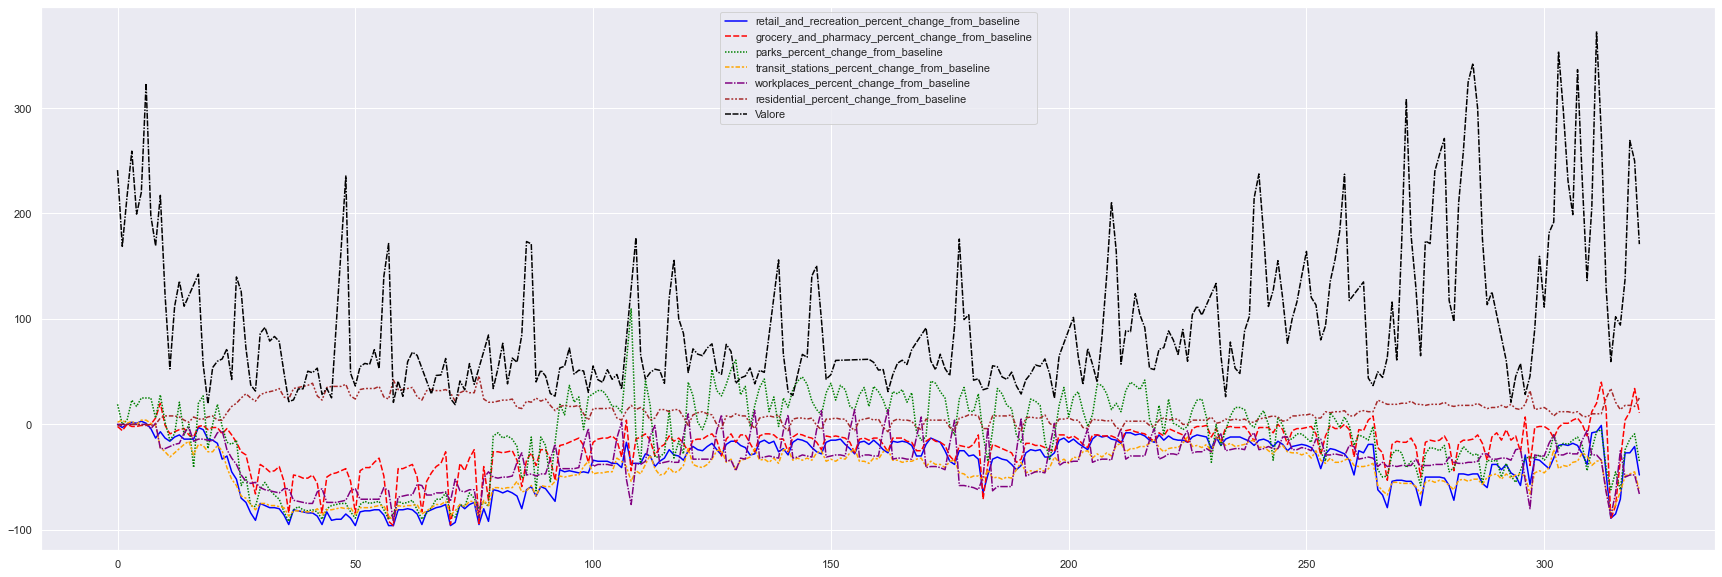

In [124]:
plt.figure(figsize=(30, 10))
palette.append("black")
sns.lineplot(data=merged_data, palette=palette)